# **CS 351L - AI Lab 09**

In [3]:
# Importing necessary libraries
import numpy as np  # For numerical operations
import pandas as pd  # For data handling
from sklearn.model_selection import train_test_split  # For splitting data
from sklearn.preprocessing import LabelBinarizer, StandardScaler  # For preprocessing
from sklearn.metrics import ConfusionMatrixDisplay, classification_report  # For evaluation
import tensorflow as tf  # For building and training models
from tensorflow.keras.models import Sequential  # Sequential model API
from tensorflow.keras.layers import Dense, Dropout  # Layers for the neural network
from tensorflow.keras.regularizers import l1, l2  # Regularization
import matplotlib.pyplot as plt  # For visualizations

# Ensure reproducibility
np.random.seed(42)
tf.random.set_seed(42)


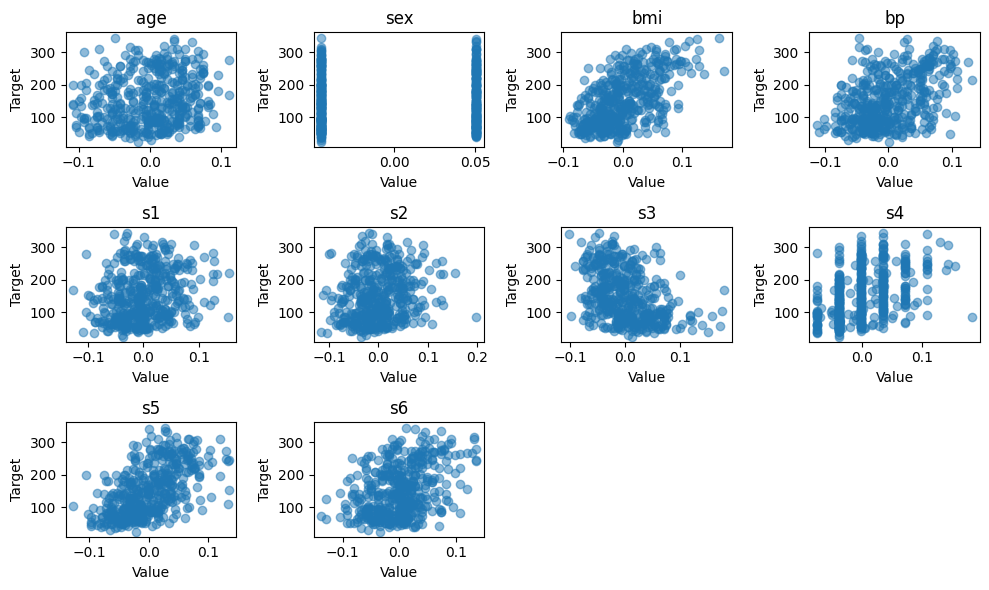

In [9]:
# Loading the diabetes dataset
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
X = diabetes.data  # Features
y = diabetes.target  # Target labels

# Convert to DataFrame for visualization
diabetes_df = pd.DataFrame(X, columns=diabetes.feature_names)
diabetes_df['target'] = y

# Visualize raw features
plt.figure(figsize=(10, 6))
for i, feature in enumerate(diabetes.feature_names):
    plt.subplot(3, 4, i + 1)  # Adjust grid size based on number of features
    plt.scatter(diabetes_df[feature], diabetes_df['target'], alpha=0.5)
    plt.title(feature)
    plt.xlabel('Value')
    plt.ylabel('Target')
plt.tight_layout()
plt.show()




**Step 3: Preprocess the Data and Visualize**
    

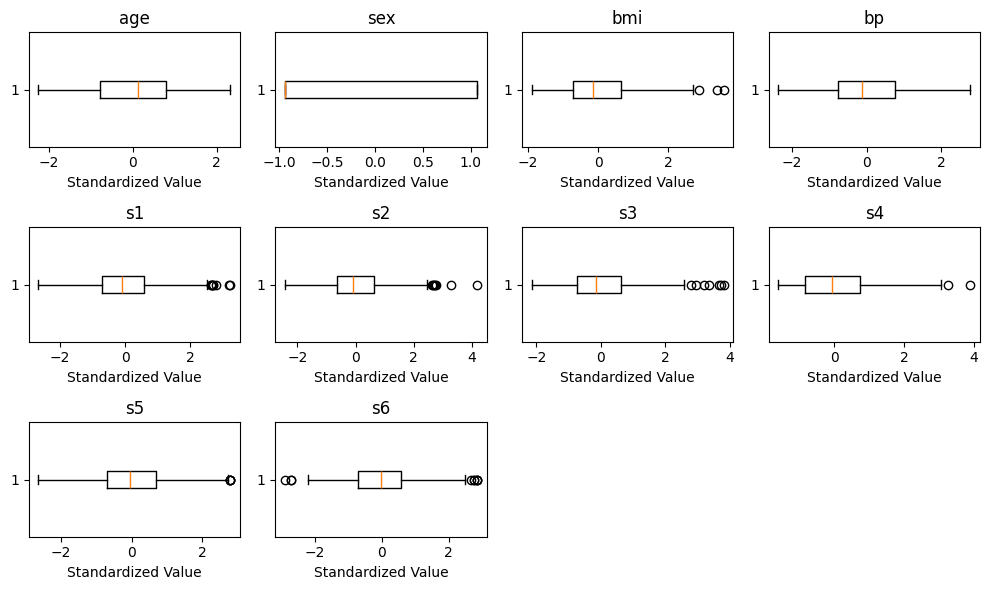

In [10]:
# One-hot encode the target labels
encoder = LabelBinarizer()
y_encoded = encoder.fit_transform(y)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Calculate the grid size based on the number of features
num_features = len(diabetes.feature_names)
rows = (num_features + 3) // 4  # 4 features per row

# Visualize standardized features
plt.figure(figsize=(10, 6))
for i in range(X_scaled.shape[1]):
    plt.subplot(rows, 4, i + 1)
    plt.boxplot(X_scaled[:, i], vert=False)
    plt.title(diabetes.feature_names[i])
    plt.xlabel('Standardized Value')
plt.tight_layout()
plt.show()



## **Step 4: Split Data into Training and Testing Sets**
Split the data into training and testing sets and prepare for modeling.
    

In [13]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Visualize the size of the training and testing sets
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")


Training set size: 309 samples
Testing set size: 133 samples


In [15]:
def build_baseline_model(input_dim, output_dim):
    model = Sequential([
        Dense(8, activation='relu', input_shape=(input_dim,)),  # Hidden layer
        Dense(output_dim, activation='softmax')  # Output layer
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  # Compile the model
    return model

# Function to build a model with Dropout
def build_dropout_model(input_dim, output_dim):
    model = Sequential([
        Dense(8, activation='relu', input_shape=(input_dim,)),
        Dropout(0.5),  # Dropout layer with 50% dropout rate
        Dense(output_dim, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Function to build a model with L1 regularization
def build_l1_model(input_dim, output_dim):
    model = Sequential([
        Dense(8, activation='relu', input_shape=(input_dim,), kernel_regularizer=l1(0.01)),  # L1 regularization
        Dense(output_dim, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Function to build a model with L2 regularization
def build_l2_model(input_dim, output_dim):
    model = Sequential([
        Dense(8, activation='relu', input_shape=(input_dim,), kernel_regularizer=l2(0.01)),  # L2 regularization
        Dense(output_dim, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


**Visualize Training Results**
  

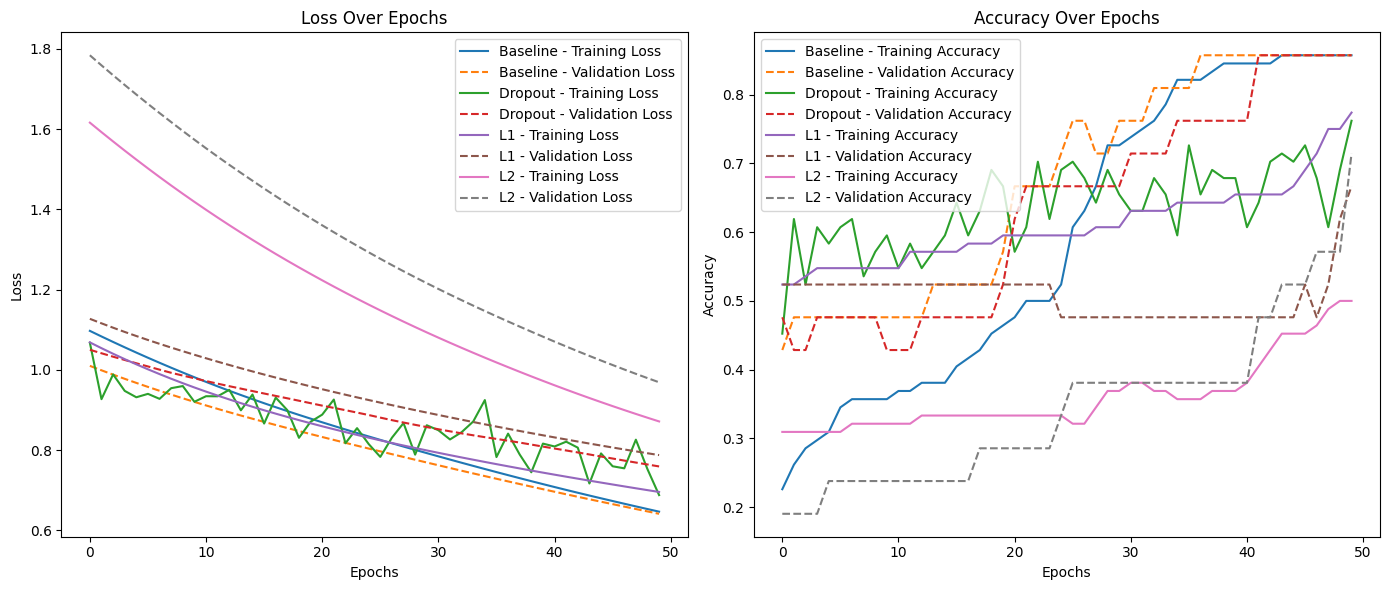

In [ ]:

# Function to plot training and validation results
def plot_history(histories, labels):
    plt.figure(figsize=(14, 6))

    # Plot loss
    plt.subplot(1, 2, 1)
    for history, label in zip(histories, labels):
        plt.plot(history.history['loss'], label=f'{label} - Training Loss')
        plt.plot(history.history['val_loss'], linestyle='dashed', label=f'{label} - Validation Loss')
    plt.title('Loss Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    for history, label in zip(histories, labels):
        plt.plot(history.history['accuracy'], label=f'{label} - Training Accuracy')
        plt.plot(history.history['val_accuracy'], linestyle='dashed', label=f'{label} - Validation Accuracy')
    plt.title('Accuracy Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Compare all models
plot_history(
    [history_baseline, history_dropout, history_l1, history_l2],
    ['Baseline', 'Dropout', 'L1', 'L2']
)



## **Step 6: Evaluate Models on Test Data**
Evaluate each model and visualize the confusion matrix.
    

Evaluating Baseline Model
Test Loss: 0.6661, Test Accuracy: 0.8444
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


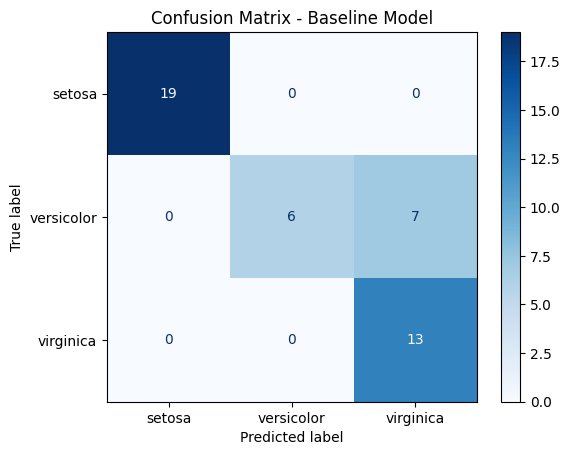

Evaluating Dropout Model
Test Loss: 0.6774, Test Accuracy: 0.7333
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


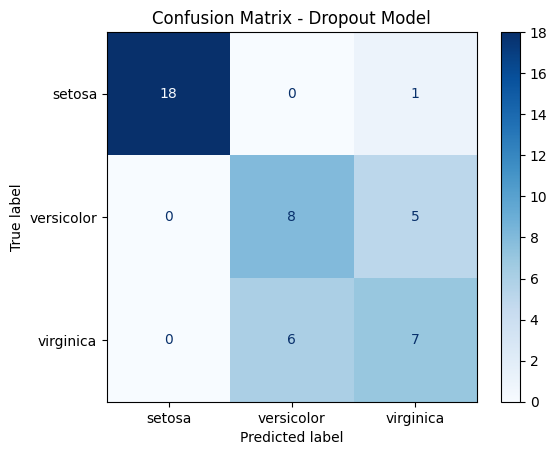

Evaluating L1 Model
Test Loss: 0.6136, Test Accuracy: 0.6444


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


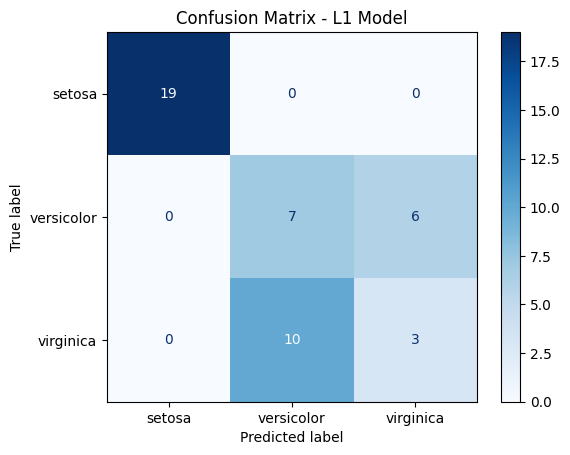

Evaluating L2 Model
Test Loss: 0.7916, Test Accuracy: 0.6444
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


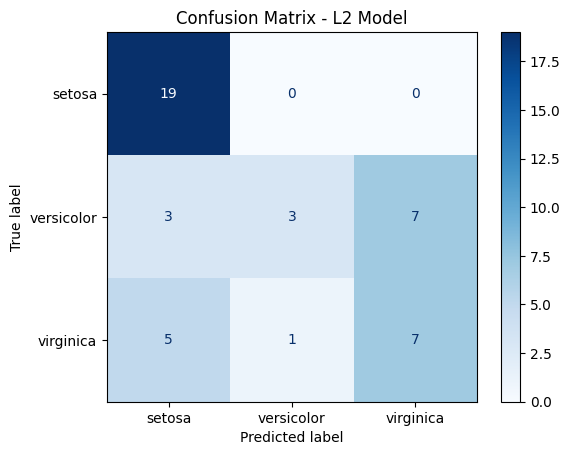

In [ ]:

# Evaluate models on test data
models = [baseline_model, dropout_model, l1_model, l2_model]
labels = ['Baseline', 'Dropout', 'L1', 'L2']

for model, label in zip(models, labels):
    print(f"Evaluating {label} Model")
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_test, axis=1)
    ConfusionMatrixDisplay.from_predictions(y_true_classes, y_pred_classes, display_labels=target_names, cmap="Blues")
    plt.title(f"Confusion Matrix - {label} Model")
    plt.show()
